In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
#combine data and rename
df1 = pd.read_csv('./data/final_version_yeah.csv')
df1 = df1.drop('Unnamed: 0',axis =1)
df2 = pd.read_csv('./data/FINAL_version_advanced_adj_score.csv')
data = pd.concat([df1,df2[['BoxOffice_origin','Adj_Score']]],axis =1)
cols = data.columns.tolist()
cols=[cols[0]] + cols[-2:] + cols[1:-2]
data = data[cols]
data.columns = ['Adjusted_BoxOffice','BoxOffice','NLP_Score'] + cols[3:]
data[['Adjusted_BoxOffice','BoxOffice']] = data[['Adjusted_BoxOffice','BoxOffice']] / 10**6
data.to_csv('./data/data_combined.csv',index=False)
data.describe()

,Adjusted_BoxOffice,BoxOffice,NLP_Score,Runtime,Year,imdbRating,imdbVotes,Internet_Movie_Database,Rotten_Tomatoes,Metacritic,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Country_count
count,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,1.111600e+04,11116.000000,11116.000000,11116.000000,...,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000
mean,35.357498,21.697482,9.319813,105.038503,2001.868028,6.386128,4.832417e+04,6.386128,5.803619,5.692463,...,0.077186,0.001889,0.222382,0.067740,0.000630,0.032026,0.200072,0.033375,0.013134,1.483177
std,88.787943,48.676256,5.220761,19.559300,11.891031,1.016191,1.157646e+05,1.016191,2.645337,1.483761,...,0.266898,0.043425,0.415865,0.251311,0.025088,0.176077,0.400072,0.179623,0.113855,0.923227
min,0.000082,0.000074,1.046110,12.000000,1915.000000,1.100000,6.000000e+00,1.100000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128281,0.097389,4.820445,93.000000,1995.000000,5.800000,1.993000e+03,5.800000,3.800000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.408052,2.157774,8.493436,101.000000,2004.000000,6.500000,8.553000e+03,6.500000,5.940134,5.756893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.362811,21.702309,12.910950,113.000000,2011.000000,7.100000,4.061050e+04,7.100000,8.000000,6.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3604.969952,936.658640,28.227371,566.000000,2018.000000,9.300000,2.018482e+06,9.300000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


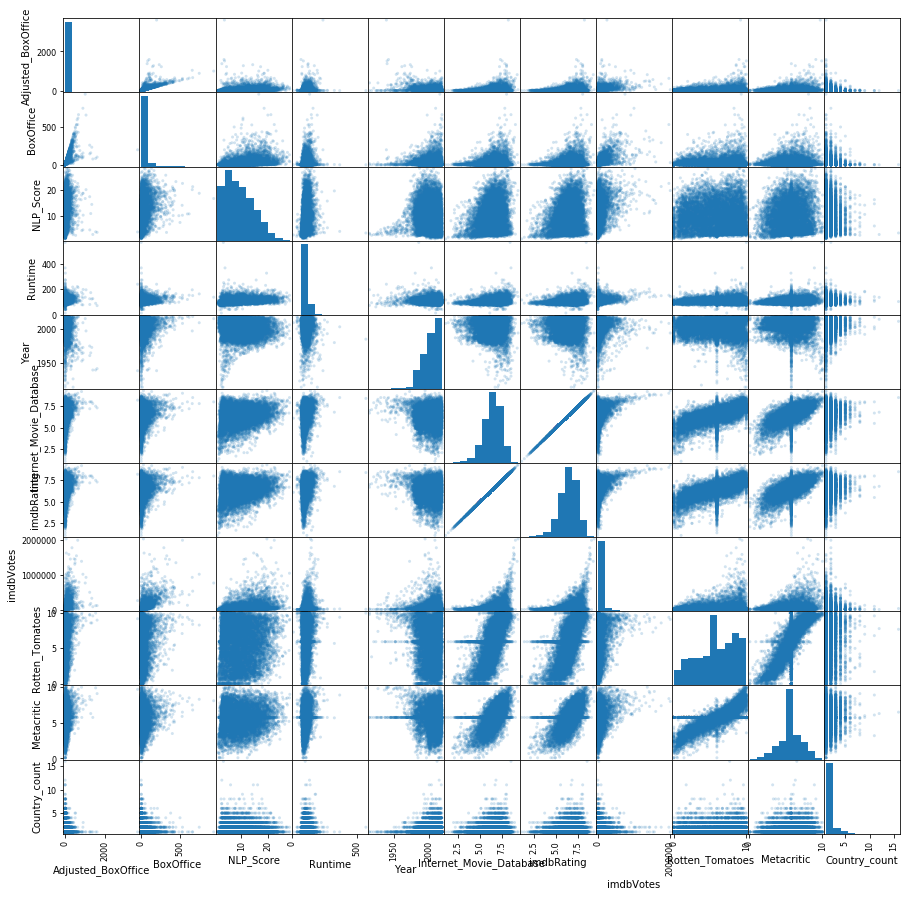

In [3]:
# EDA
plt.rcParams['figure.figsize'] = [15, 15]
selected_features = ['Adjusted_BoxOffice','BoxOffice','NLP_Score', 'Runtime', 'Year','Internet_Movie_Database',
       'imdbRating', 'imdbVotes', 'Rotten_Tomatoes',
       'Metacritic', 'Country_count']
pd.plotting.scatter_matrix(data[selected_features],alpha=0.2,grid=False)
plt.show()

**Cmt:**<br>
Obviously the plot data is too messy. In this scale feature is not informative. Try to narrow down by discarding movies that are either too old or have extreme box offices to see if we can improve.

In [4]:
# Some data Cleaning
data = data[(data.BoxOffice>=1) & (data.BoxOffice<=100) &
            (data.Runtime >= 50) & (data.Runtime <= 200) & 
            (data.Year >= 1990)]
data.describe()

,Adjusted_BoxOffice,BoxOffice,NLP_Score,Runtime,Year,imdbRating,imdbVotes,Internet_Movie_Database,Rotten_Tomatoes,Metacritic,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Country_count
count,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4.296000e+03,4296.000000,4296.000000,4296.000000,...,4296.000000,4296.000000,4296.000000,4296.000000,4296.0,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000
mean,32.157020,23.802780,11.227162,107.000233,2003.842877,6.342900,6.230626e+04,6.342900,5.209743,5.476358,...,0.100093,0.000233,0.253026,0.078445,0.0,0.040736,0.254888,0.030261,0.012104,1.545158
std,32.273275,23.751832,5.117522,17.407858,8.158913,1.014145,1.017615e+05,1.014145,2.808608,1.653428,...,0.300159,0.015257,0.434796,0.268902,0.0,0.197700,0.435849,0.171324,0.109364,0.971927
min,1.046240,1.000000,1.144368,63.000000,1990.000000,1.900000,8.300000e+01,1.900000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.998640,4.432662,7.183626,95.000000,1997.000000,5.700000,9.681250e+03,5.700000,2.700000,4.475000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,20.851910,15.157695,11.033620,104.000000,2004.000000,6.400000,2.928050e+04,6.400000,5.400000,5.756893,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.488696,36.105218,14.855948,115.250000,2011.000000,7.100000,7.440750e+04,7.100000,7.700000,6.400000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2.000000
max,176.978401,99.733121,27.950823,197.000000,2018.000000,9.300000,2.018482e+06,9.300000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,16.000000


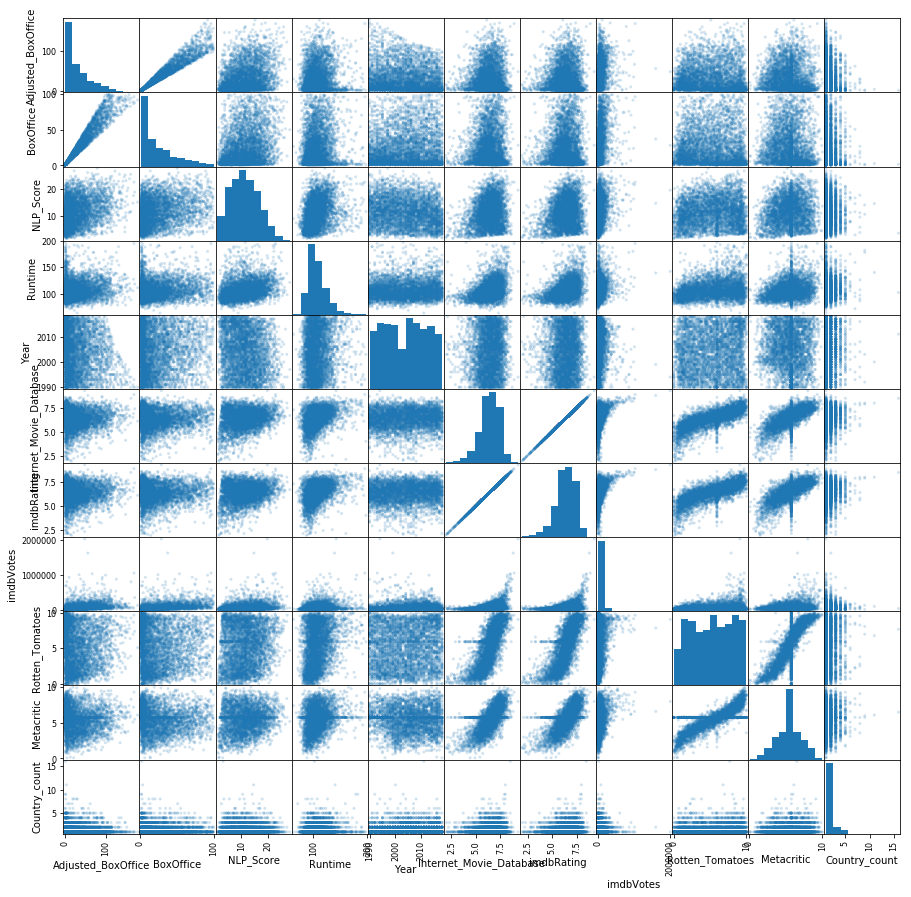

In [5]:
pd.plotting.scatter_matrix(data[selected_features],alpha=0.2,grid=False)
plt.show()

**Cmt:**<br>
Slightly improved. At least it shows Runtime is negatively correlated and imdbRating is positive correlated with BoxOffice. Surprisingly, the other two scores is not imformative at all. Or NLP predictor shows slightly upward trend which is good.

In [13]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#Baseline Model: A simple Regression

data_model1 = data[['Adjusted_BoxOffice', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model1.drop('Adjusted_BoxOffice',axis = 1)
y = data_model1['Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model1 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est1 = lr_model1.fit()
print(lr_est1.summary())

# Out of Sample
pred = lr_est1.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))

                            OLS Regression Results                            
Dep. Variable:     Adjusted_BoxOffice   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     18.62
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.49e-73
Time:                        10:51:41   Log-Likelihood:                -14493.
No. Observations:                3007   AIC:                         2.904e+04
Df Residuals:                    2982   BIC:                         2.919e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.3063      4.332     -2.379

In [14]:
#Baseline Model 2 : A simple Regression (using imdb scores and two other scores, imdbvotes)
# intersting finding: imdb and Rotten_Tomatoes scores does not matters much, but imdbvotes does contribute a lot to R2

data_model2 = data[['Adjusted_BoxOffice', 'Runtime','Year', 'imdbRating', 'imdbVotes',
       'Internet_Movie_Database', 'Rotten_Tomatoes', 'Metacritic',
       'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model2.drop('Adjusted_BoxOffice',axis = 1)
y = data_model2['Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model2 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est2 = lr_model2.fit()
print(lr_est2.summary())

# Out of Sample
pred = lr_est2.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))


                            OLS Regression Results                            
Dep. Variable:     Adjusted_BoxOffice   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     36.97
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          7.57e-175
Time:                        10:51:48   Log-Likelihood:                -14240.
No. Observations:                3007   AIC:                         2.854e+04
Df Residuals:                    2977   BIC:                         2.872e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [8]:
# improved model 3: Refined Linear regression with significant features and NLP Scores

tb = lr_est1.summary().tables[1]
coefs = pd.DataFrame(tb.data[1:],columns=tb.data[0])
useful_features = coefs[pd.to_numeric(coefs['P>|t|']) <= 0.005][''].values.tolist()[1:]
useful_dummy_features = useful_features[6:-1]

new_data = data[useful_features+ ['NLP_Score','Adjusted_BoxOffice']] 
new_data['Other_genres'] = 1 * ((1 - new_data[useful_dummy_features].sum(axis = 1)) >0)


data_model3 = new_data

X = data_model3.drop('Adjusted_BoxOffice',axis = 1)
y = data_model3['Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model3 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est3 = lr_model3.fit()
print(lr_est3.summary())

# Out of Sample
pred = lr_est3.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))



                            OLS Regression Results                            
Dep. Variable:     Adjusted_BoxOffice   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     87.47
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          1.05e-130
Time:                        10:50:57   Log-Likelihood:                -14388.
No. Observations:                3007   AIC:                         2.879e+04
Df Residuals:                    2998   BIC:                         2.885e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Adventure        10.1111      1.678      6.025

/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
# improved model 4: Regression Tree with Cross Validation
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

data_model4 = data[['Adjusted_BoxOffice', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]

X = data_model4.drop('Adjusted_BoxOffice',axis = 1)
y = data_model4['Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


k = 5
for min_samples_leaf in range(10,200,10):
    rg_tree = DecisionTreeRegressor(random_state=0,min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(rg_tree, X_train, y_train,scoring= 'r2', cv=5, n_jobs=1)
    insr = np.mean(scores)
    rg_tree.fit(X_train,y_train)
    oosr = rg_tree.score(X_test,y_test)
    print('In Sample R2: %0.3f | Out of Sample R2: %0.3f' %(insr,oosr))

/home/wwengm/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In Sample R2: 0.031 | Out of Sample R2: 0.058
In Sample R2: 0.090 | Out of Sample R2: 0.129
In Sample R2: 0.110 | Out of Sample R2: 0.153
In Sample R2: 0.123 | Out of Sample R2: 0.153
In Sample R2: 0.134 | Out of Sample R2: 0.157
In Sample R2: 0.138 | Out of Sample R2: 0.158
In Sample R2: 0.141 | Out of Sample R2: 0.163
In Sample R2: 0.137 | Out of Sample R2: 0.161
In Sample R2: 0.136 | Out of Sample R2: 0.166
In Sample R2: 0.123 | Out of Sample R2: 0.168
In Sample R2: 0.121 | Out of Sample R2: 0.164
In Sample R2: 0.122 | Out of Sample R2: 0.160
In Sample R2: 0.130 | Out of Sample R2: 0.157
In Sample R2: 0.127 | Out of Sample R2: 0.153
In Sample R2: 0.116 | Out of Sample R2: 0.153
In Sample R2: 0.119 | Out of Sample R2: 0.153
In Sample R2: 0.120 | Out of Sample R2: 0.146
In Sample R2: 0.111 | Out of Sample R2: 0.143
In Sample R2: 0.113 | Out of Sample R2: 0.143


In [29]:
# improved model 5: NN
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation
from keras.models import Sequential

data_model5 = data_model4
X = data_model4.drop('Adjusted_BoxOffice',axis = 1)
y = data_model4['Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = len(X.columns)))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1)) #output layer
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 150, epochs = 50)

Epoch 1/50
3007/3007 [==============================] - 1s 262us/step - loss: 2035.2481
Epoch 2/50
3007/3007 [==============================] - 0s 28us/step - loss: 1933.6991
Epoch 3/50
3007/3007 [==============================] - 0s 29us/step - loss: 1696.9477
Epoch 4/50
3007/3007 [==============================] - 0s 27us/step - loss: 1292.3168
Epoch 5/50
3007/3007 [==============================] - 0s 28us/step - loss: 1016.9655
Epoch 6/50
3007/3007 [==============================] - 0s 29us/step - loss: 932.6408
Epoch 7/50
3007/3007 [==============================] - 0s 31us/step - loss: 885.7351
Epoch 8/50
3007/3007 [==============================] - 0s 28us/step - loss: 857.8125
Epoch 9/50
3007/3007 [==============================] - 0s 27us/step - loss: 841.9785
Epoch 10/50
3007/3007 [==============================] - 0s 35us/step - loss: 830.6113
Epoch 11/50
3007/3007 [==============================] - 0s 36us/step - loss: 822.9636
Epoch 12/50
3007/3007 [=======================

In [30]:
predt = model.predict(X_train).T.tolist()[0]
insr = 1 - sum([x*x for x in (predt-y_train)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
pred = model.predict(X_test).T.tolist()[0]
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('In Sample R2: %0.3f | Out of Sample R2: %0.3f' %(insr,oosr))

In Sample R2: -0.666 | Out of Sample R2: 0.236


In [12]:
# Conclusion:
# We use 3 models 1) regression (With NLP_Scores) 2) Regression Tree and 3) Neural Networks.
# Out of the 3, NN has best out of sample performance 23.5 vs baseline 2 (which includes raw scores) 28
# On contrary, Baseline 1( w/o raw scores)  only achieves 13. huge improvement.
# However, prediction have has huge variance. Can be seen because in sample R2 lower than OOSR for all models.